The data comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

We will overlay the Average Temperatures in 2015 against 2005-2014\n in Ann Arbor (United States).

<h2>Import Libraries</h2>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<h2>EDA</h2>

<h3>Loading Datas</h3>

In [7]:
df = pd.read_csv("dataset/Ann_Arbor_Temperatures.zip", compression='zip')

df.head(5)
df.shape
df.info()  # Checking for data types
df.isnull().sum(axis=0)  # Checking for missing values

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


(165085, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165085 entries, 0 to 165084
Data columns (total 4 columns):
ID            165085 non-null object
Date          165085 non-null object
Element       165085 non-null object
Data_Value    165085 non-null int64
dtypes: int64(1), object(3)
memory usage: 5.0+ MB


ID            0
Date          0
Element       0
Data_Value    0
dtype: int64

<h3>Data Preprocessing</h3>

In [8]:
# Creating a new field: Month-Day
df['Month_Day'] = df['Date'].apply(lambda x: x[5:])
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by="Date", inplace=True)

df.reset_index(inplace=True)
df.drop(['index', 'ID'], axis=1, inplace=True)

# Deleting 29-February dates
mask = (df['Month_Day']!= '02-29')
df = df[mask]

df.shape
df.head(5)

(165002, 4)

,Date,Element,Data_Value,Month_Day
0,2005-01-01,TMIN,0,01-01
1,2005-01-01,TMAX,150,01-01
2,2005-01-01,TMIN,-11,01-01
3,2005-01-01,TMIN,-44,01-01
4,2005-01-01,TMAX,33,01-01


<h3>Feature Generation</h3>

In [9]:
# Calculate the average min temperatures in 2015 for each day of month
mask = (df['Date'].dt.year == 2015) & (df['Element'] == 'TMIN')
tMin_2015 = df[mask][['Month_Day', 'Data_Value']]
tMin_2015 = tMin_2015.groupby(['Month_Day']).agg({'Data_Value': np.average})
tMin_2015.reset_index(inplace=True)
tMin_2015.columns = ['Month_Day', 'Temp_min_avg']
tMin_2015['Temp_min_avg'] = tMin_2015['Temp_min_avg'] / 10

# Calculate the average max temperatures in 2015 for each day of month
mask = (df['Date'].dt.year == 2015) & (df['Element'] == 'TMAX')
tMax_2015 = df[mask][['Month_Day', 'Data_Value']]
tMax_2015 = tMax_2015.groupby(['Month_Day']).agg({'Data_Value': np.average})
tMax_2015.reset_index(inplace=True)
tMax_2015.columns = ['Month_Day', 'Temp_max_avg']
tMax_2015['Temp_max_avg'] = tMax_2015['Temp_max_avg'] / 10

# Calculate the average min temperatures between 2005 and 2014 for each day of month
mask = (df['Date'].dt.year < 2015) & (df['Element'] == 'TMIN')
tMin = df[mask][['Month_Day', 'Data_Value']]
tMin = tMin.groupby(['Month_Day']).agg({'Data_Value': np.average})
tMin.reset_index(inplace=True)
tMin.columns = ['Month_Day', 'Temp_min_avg']
tMin['Temp_min_avg'] = tMin['Temp_min_avg'] / 10


# Calculate the average max temperatures between 2005 and 2014 for each day of month
mask = (df['Date'].dt.year < 2015) & (df['Element'] == 'TMAX')
tMax = df[mask][['Month_Day', 'Data_Value']]
tMax = tMax.groupby(['Month_Day']).agg({'Data_Value': np.average})
tMax.reset_index(inplace=True)
tMax.columns = ['Month_Day', 'Temp_max_avg']
tMax['Temp_max_avg'] = tMax['Temp_max_avg'] / 10


# Getting the avg temperature of 2015 that are smaller / bigger than the avg measures of 2005-2014 
broken_min = (tMin_2015[tMin_2015['Temp_min_avg'] < tMin['Temp_min_avg']])
broken_max = (tMax_2015[tMax_2015['Temp_max_avg'] > tMax['Temp_max_avg']])

tMin_2015.shape
tMax_2015.shape
tMin.shape
tMax.shape

(365, 2)

(365, 2)

(365, 2)

(365, 2)

<h2>Plotting the Chart</h2>

<Figure size 1200x900 with 0 Axes>

[-5, 375, -40, 40]

Text(0.5, 1.0, 'Average Broken Temperatures in 2015 against 2005-2014\n in Ann Arbor, United States')

([<matplotlib.axis.XTick at 0x26a8fe519c8>,
 <a list of 12 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x26a91307fc8>,
 <a list of 9 Text yticklabel objects>)

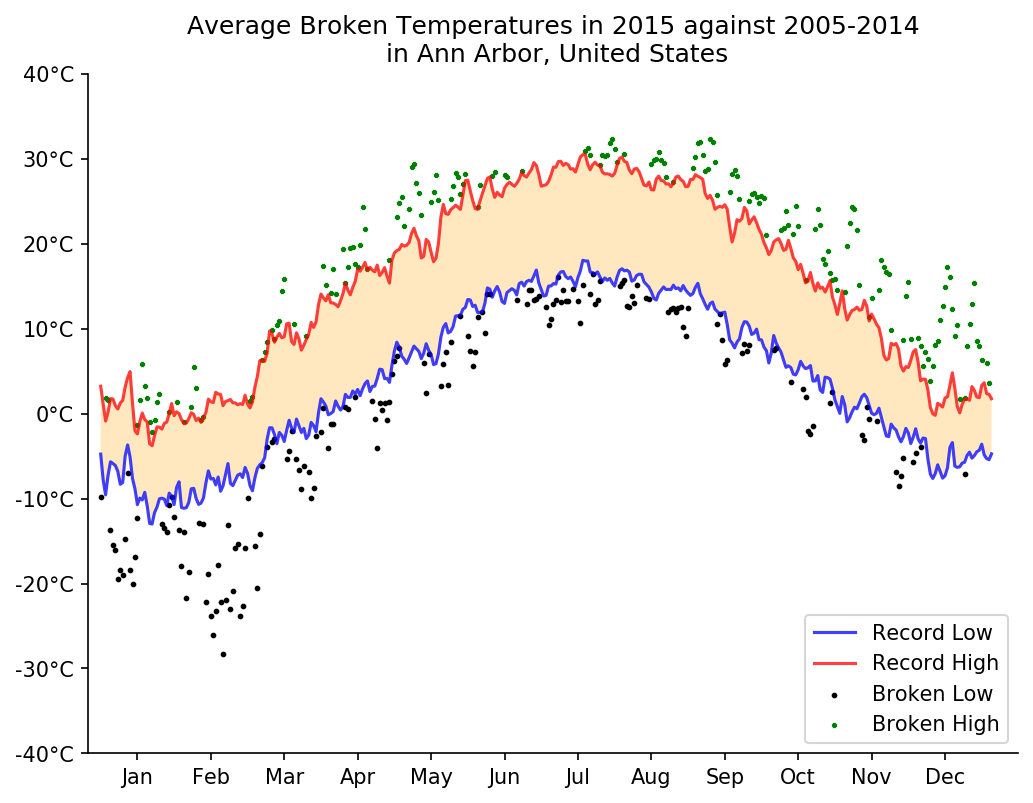

In [10]:
plt.figure(figsize=(8, 6), dpi=150)
# plotting the average temperatures from 2005 to 2014
plt.plot(tMin['Temp_min_avg'], c='b', alpha=0.75, label='Record Low')
plt.plot(tMax['Temp_max_avg'], c='r', alpha=0.75, label='Record High')

# plotting the average temperatures of 2015
plt.scatter(broken_min.index.tolist(), broken_min['Temp_min_avg'].tolist(), c='black', s=3, marker='o')
plt.scatter(broken_max.index.tolist(), broken_max['Temp_max_avg'].tolist(), c='green', s=3, marker='x')

# Setting a good size for the graph
plt.gca().axis([-5, 375, -40, 40])

# Smoothing the area between the average temperatures from 2005 to 2014
plt.gca().fill_between(range(len(tMin['Temp_min_avg'])), 
                       tMin['Temp_min_avg'], tMax['Temp_max_avg'], 
                       facecolor='orange', 
                       alpha=0.25)

# Setting the labels
#plt.xlabel('Month')
#plt.ylabel('Temperature (Tenths of Degrees C)')
plt.title('Average Broken Temperatures in 2015 against 2005-2014\n in Ann Arbor, United States')

# Showing the legend on the lower right of the charts in order to don't disturbe the graph
plt.legend(['Record Low', 'Record High', 'Broken Low', 'Broken High'], loc=4)

# Removing the upper and right axis line of the chart
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Changing the indexes values with the month name
day_ticks_bin = [x+15 for x in range(0, 360, 30)]  # +15 it's useful for centering the month name respect the values
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(day_ticks_bin, month_names)

temp_bin = [x for x in range(-40, 50, 10)]
temp_names = [str(x)+u'\N{DEGREE SIGN}C' for x in temp_bin]
plt.yticks(temp_bin, temp_names)

plt.show()